In [58]:
import json
import threading
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.preprocessing import MultiLabelBinarizer

DATA_DIR = "../data/"

In [59]:
with open(DATA_DIR + "train.json") as train, open(DATA_DIR + "test.json") as test, open(DATA_DIR + "validation.json") as validation:
    train_json = json.load(train)
    test_json = json.load(test)
    validation_json = json.load(validation)

def set_image_filename(row, image_set):
    """
    Function that returns properly annotated image filename path from dataframe row
    Format: id_{imageId}_labels_{labelId}
    Returns: true image path
    """
    labels = [int(x) for x in row['labelId']]
    true_image_path = DATA_DIR + "{}/id_{}_labels_{}.jpg".format(image_set, row['imageId'], labels)
    return true_image_path
    
def load_images(json_file, image_set):
    """
    Function to load, merge and correctly path all images for a given set
    Returns: dataframe
    """
    images_df = pd.DataFrame(json_file['images'])
    if image_set == 'test':
        images_df['imagePath'] = images_df['imageId'].map(lambda x: DATA_DIR + "{}/{}.jpg".format(image_set, x))
        return images_df
    else:
        annotations_df = pd.DataFrame(json_file['annotations'])
        merged = pd.merge(images_df, annotations_df, on='imageId', how='inner')
        merged['imagePath'] = merged.apply(lambda row: set_image_filename(row, image_set), axis=1)
        return merged
        
train_df = load_images(train_json, "train")
test_df = load_images(test_json, "test")
validation_df = load_images(validation_json, "validation")

In [60]:
mlb = MultiLabelBinarizer()
train_labels_np = mlb.fit_transform(train_df['labelId'])
train_labels = pd.DataFrame(data = train_labels_np, columns = list(mlb.classes_))

validation_labels_np = mlb.transform(validation_df['labelId'])
validation_labels = pd.DataFrame(data = validation_labels_np, columns = list(mlb.classes_))

In [61]:
print(train_df.shape)
train_df.head()

(1014544, 4)


,imageId,url,labelId,imagePath
0,1,https://contestimg.wish.com/api/webimage/570f3...,"[95, 66, 137, 70, 20]","../data/train/id_1_labels_[95, 66, 137, 70, 20..."
1,2,https://contestimg.wish.com/api/webimage/5468f...,"[36, 66, 44, 214, 105, 133]","../data/train/id_2_labels_[36, 66, 44, 214, 10..."
2,3,https://contestimg.wish.com/api/webimage/54641...,"[170, 66, 97, 153, 105, 138]","../data/train/id_3_labels_[170, 66, 97, 153, 1..."
3,4,https://contestimg.wish.com/api/webimage/550b9...,"[18, 66, 44, 153, 164]","../data/train/id_4_labels_[18, 66, 44, 153, 16..."
4,5,https://contestimg.wish.com/api/webimage/54451...,"[189, 66, 176, 137, 153, 74, 181, 171, 138]","../data/train/id_5_labels_[189, 66, 176, 137, ..."


In [62]:
print(train_labels.shape)
train_labels.head()

(1014544, 228)


,1,10,100,101,102,103,104,105,106,107,...,90,91,92,93,94,95,96,97,98,99
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


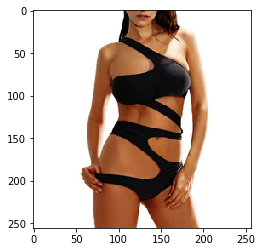

372749
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
../data/train/id_372750_labels_[189, 17, 66, 176, 171].jpg


In [63]:
rand_img = np.random.randint(0, len(train_df.index))
target_size=(256,256)


img_label = np.array(train_labels.iloc[rand_img]).reshape(1, 228)
img_path = train_df.iloc[rand_img]['imagePath']
image = Image.open(img_path)
image_resized = image.resize(target_size, Image.ANTIALIAS)
image_resized.thumbnail(target_size, Image.ANTIALIAS)
plt.imshow(np.asarray(image_resized))
plt.show()
print(rand_img)
print(img_label)
print(img_path)

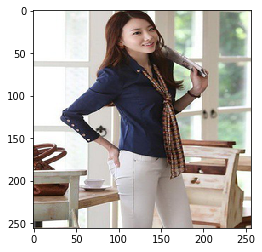

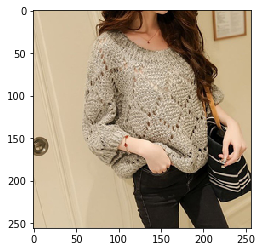

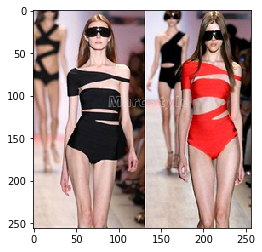

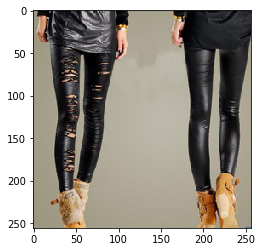

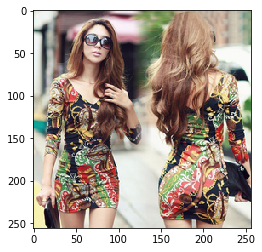

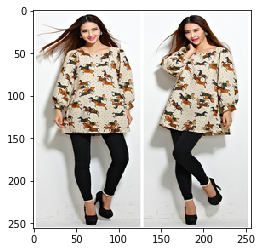

(array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.74901961, 0.75294118, 0.6627451 ],
         [0.71764706, 0.71372549, 0.65882353],
         [0.70980392, 0.70588235, 0.62745098]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.90980392, 0.92156863, 0.83529412],
         [0.86666667, 0.87843137, 0.82352941],
         [0.8627451 , 0.85882353, 0.8       ]],

        [[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.98039216, 1.        , 0.9254902 ],
         [0.97254902, 0.98823529, 0.94117647],
         [0.96470588, 0.96470588, 0.93333333]],

        ...,

        [[0.44313725, 0.43137255, 0.48235294],
         [0.34509804, 0.33333333, 0.38039216

In [66]:
class BatchGenerator:
    def __init__(self, img_dataframe, label_dataframe, batch_size=32, target_size=(256,256)):
        self.img_dataframe = img_dataframe
        self.label_dataframe = label_dataframe
        self.batch_size = batch_size
        self.lock = threading.Lock()
        self.TARGET_SIZE=target_size
        
    def __iter__(self):
        return self
    
    def next(self):
        return self.__next__()
      
    def __next__(self):
        with self.lock:
            while True:
                X = []
                y = []
                for i in range(self.batch_size):
                    # get a random number
                    rand_img = np.random.randint(0, len(self.img_dataframe.index))
                    # get label from random number
                    img_label = np.array(self.label_dataframe.iloc[rand_img]).reshape(1, 228)
                    # get image path from random number
                    img_path = self.img_dataframe.iloc[rand_img]['imagePath']
                    # open image
                    image = Image.open(img_path)
                    # resize image
                    image_resized = image.resize(self.TARGET_SIZE, Image.ANTIALIAS)
                    # set image to thumbnail (proper scaling)
                    image_resized.thumbnail(self.TARGET_SIZE, Image.ANTIALIAS)
                    
                    plt.imshow(np.asarray(image_resized))
                    plt.show()
                    
                    # cast image as np.array
                    X_batch = np.asarray(image_resized).reshape(1, 256, 256, 3)
                    # with proper datatype
                    X_batch = X_batch / 255.0
                    X.append(X_batch)
                    y.append(img_label)
                return np.array(X).reshape(self.batch_size, 256, 256, 3), np.array(y).reshape(self.batch_size, 228)

                    

train_gen = BatchGenerator(train_df, train_labels, batch_size = 6)
print(next(train_gen))
# val_gen = BatchGenerator(validation_df, validation_labels)
# print(next(val_gen))
